## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt     
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

## PART 1

#### Part 1- 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [2]:
df1 = pd.read_csv('C:\\Users\\Sai\\Desktop\GL\\Project3_ensumble_techniques\\TelcomCustomer_Churn_1.csv')

In [3]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


#### Part 1- 1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [4]:
df2 = pd.read_csv('C:\\Users\\Sai\\Desktop\GL\\Project3_ensumble_techniques\\TelcomCustomer_Churn_2.csv')

In [5]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Part 1- 1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [6]:
ndf = pd.merge(df1,df2, on = 'customerID')
ndf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Part 1- 1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python

In [7]:
df1.shape

(7043, 10)

In [8]:
df2.shape

(7043, 12)

In [9]:
ndf.shape

(7043, 21)

In [10]:
columnname1 = df1.columns
columnname2 = df2.columns
columnname3 = ndf.columns
if columnname3.all() in (columnname2.all(), columnname3.all()):
    print('All the columns in the DataFrame are same')
else:
    print('All the columns in the DataFrame are not same')

All the columns in the DataFrame are same


###### * All the columns in the Dataframe are merged propely

#### Part 1- 2 a Impute missing/unexpected values in the DataFrame

In [11]:
percentage_missing = ndf.isnull().sum() * 100 / len(ndf)
ndf = ndf.replace(r'^\s*$', np.nan, regex=True)
ndf = ndf.apply(lambda x: x.fillna(0),axis=0)
missing_values = ["?", "a", "-",""]
ndfnew = ndf.replace(missing_values, np.nan)
ndfnew = ndfnew.apply(lambda x: x.fillna(0),axis=0)
ndfnew.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### part 1- 2 b Make sure all the variables with continuous values are of ‘Float’ type

In [12]:
ndfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### * TotalCharges is a continuous variable. It should be converted to float

In [13]:
ndfnew['TotalCharges'] = ndfnew['TotalCharges'].apply(pd.to_numeric, errors='coerce')
ndfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Part 1- 2 c Create a function that will accept a DataFrame as input and return pie-charts for all theappropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [14]:
ndfnew = ndfnew.drop(['customerID'], axis=1)

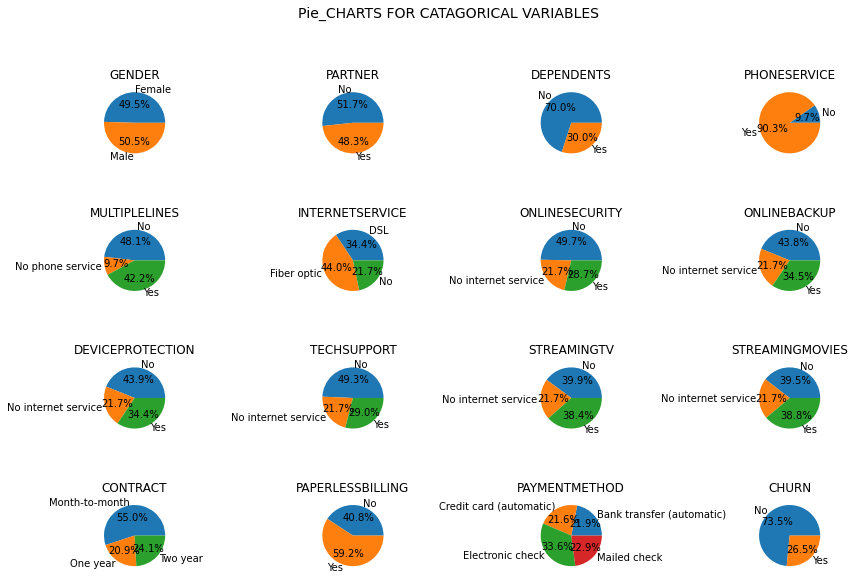

In [15]:
def pie_chart(ndf_pie,m):
    x1 = []
    for i in ndf_pie:
        x1.append(i)
    y1 = []
    for i in x1:
        if (ndfnew[i].dtype.name) == 'object':
            y1.append(i)  
    plt.figure(figsize=(15, 9))
    plt.subplots_adjust(hspace=0.8)
    plt.suptitle("Pie_CHARTS FOR CATAGORICAL VARIABLES", fontsize=14, y=1)
    
    ncols = m
    nrows = len(y1) // ncols + (len(y1) % ncols > 0)
    
    for n, i in enumerate(y1):
        ax = plt.subplot(nrows, ncols, n+1)
        ndfnew.groupby(i).size().plot(kind='pie', autopct='%.1f%%',ax=ax)
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

pie_chart(ndfnew,4) 

#### Part 1- 2 d.Share insights for Q2.c

 <li> 73.46% of the customer left the telecom company and only 26.54% of customers are still continuing the connections.
 <li>    Only 29.96% of customers having dependents
 <li>    Majority of the Customers (90.32%), having phone service
 <li>    43.96% of customers using fibre optic internet service
 <li>    49.67% of customers are not using online security
 <li>    43.84% of customers doen't use online backup and 43.94% of people not having device protection
 <li>    49.31% of customers not availing the techsupport
 <li>    around 39% of people streaming movies and TV
 <li>    21.67% of customers not having internet connections
 <li>    55% of Customers are using month to month packs
 <li>    26.54% of customers are left the service in the past month

#### Part 1 - 2 e.Encode all the appropriate Categorical features with the best suitable approach

In [16]:
print(ndfnew.gender.value_counts())
print(ndfnew.SeniorCitizen.value_counts())
print(ndfnew.Partner.value_counts())
print(ndfnew.Dependents.value_counts())
print(ndfnew.tenure.value_counts())
print(ndfnew.PhoneService.value_counts())
print(ndfnew.MultipleLines.value_counts())
print(ndfnew.InternetService.value_counts())
print(ndfnew.OnlineSecurity.value_counts())
print(ndfnew.OnlineBackup.value_counts())
print(ndfnew.DeviceProtection.value_counts())
print(ndfnew.TechSupport.value_counts())
print(ndfnew.StreamingTV.value_counts())
print(ndfnew.StreamingMovies.value_counts())
print(ndfnew.Contract.value_counts())
print(ndfnew.PaperlessBilling.value_counts())
print(ndfnew.PaymentMethod.value_counts())
print(ndfnew.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

In [17]:
replace = {"Churn": {"Yes":1,"No":0}}
ndfy_encoded = ndfnew.replace(replace)
y = ndfy_encoded['Churn'].copy()
y.unique()

array([0, 1], dtype=int64)

In [18]:
ndf_encoded = pd.get_dummies(ndfy_encoded, columns = ['gender','Partner','Dependents', 'PhoneService',
                                        'MultipleLines','InternetService', 'OnlineSecurity',
                                        'OnlineBackup','DeviceProtection','TechSupport',
                                        'StreamingTV','StreamingMovies','Contract',
                                        'PaperlessBilling', 'PaymentMethod'])
ndf_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [19]:
X = ndf_encoded.drop('Churn', axis = 1).copy()
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


#### Part 1- 2 f.Split the data into 80% train and 20% test.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print("{0:0.2f}% data is in training set".format((len(x_train)/len(X.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(X.index)) * 100))
print(display(y_train.value_counts(), y_train.value_counts(normalize = True)*100))

79.99% data is in training set
20.01% data is in test set


0    4139
1    1495
Name: Churn, dtype: int64

0    73.464679
1    26.535321
Name: Churn, dtype: float64

None


#### Part 1 - 2 g.Normalize/Standardize the data with the best suitable approach

#### Normalize

In [21]:
x_train_norm = x_train.copy()
x_test_norm = x_test.copy()
totalx_cols = X.columns
for i in totalx_cols:
    scale = MinMaxScaler().fit(x_train_norm[[i]])
    x_train_norm[i] = scale.transform(x_train_norm[[i]])
    x_test_norm[i] = scale.transform(x_test_norm[[i]])

x_train_norm.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0.0,0.486111,0.306926,0.195934,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3151,0.0,0.208333,0.565022,0.132594,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4860,0.0,0.180556,0.220727,0.067975,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3867,0.0,0.361111,0.549078,0.219429,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3810,0.0,0.013889,0.260588,0.005130,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Part 1 - 3 a. Train a model using XGBoost. Also print best performing parameters along with train and test performance

In [22]:
sum(y)/len(y)

0.2653698707936959

In [23]:
sum(y_test)/len(y_test)

0.2654364797728886

In [24]:
sum(y_train)/len(y_train)

0.2653532126375577

In [25]:
param_grid = { 
     "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,30),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
scoring = ['recall']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

xgbooster = XGBClassifier() 

random_search = RandomizedSearchCV(estimator=xgbooster, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(x_train_norm, y_train)
random_result


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importanc...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=48, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 30),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   refit='recall', scoring=['recall'])

In [26]:
y_predicted = random_search.predict(x_test_norm)
y_predicted 

array([0, 1, 0, ..., 0, 0, 0])

In [27]:
print(f'The best score is {random_result.best_score_:.4f}')
print('The best score standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
print(f'The best hyperparameters are {random_result.best_params_}')

The best score is 0.5331
The best score standard deviation is 0.036
The best hyperparameters are {'reg_lambda': 100, 'reg_alpha': 1e-05, 'max_depth': 3, 'learning_rate': 1, 'gamma': 0.4, 'colsample_bytree': 0.7}


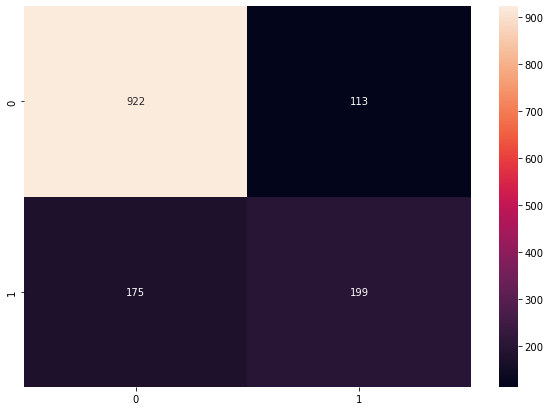

In [28]:
from sklearn.metrics import plot_confusion_matrix
conf_matr = metrics.confusion_matrix(y_test, y_predicted)
df_conf_matr = pd.DataFrame(conf_matr)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_matr, annot=True, fmt = 'g')
plt.show()

### The best performance parameters: 
<li> {'reg_lambda': 1, 'reg_alpha': 10, 'max_depth': 3, 'learning_rate': 1, 'gamma': 0.2, 'colsample_bytree': 0.7}
<li> The best score is 0.5424
<li> The best score standard deviation is 0.0295


#### Part 1 - 3 b Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

In [29]:
param_grid = { 
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    "reg_alpha": [0, 0.5, 1, 5],
    "reg_lambda": [0.5, 1, 5,10],
    "gamma":[0,0.25,1.0],
    "max_depth":[3,4,5]
      }             
scoring = ['recall']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgbooster = XGBClassifier()
grid_search = GridSearchCV(estimator=xgbooster, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
grid_result = grid_search.fit(x_train_norm, y_train)
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.8],
                         'gamma': [0, 0.25, 1.0], 'max_depth': [3, 4, 5],
                         'reg_alpha': [0, 0.5, 1, 5],
                         'reg_lambda': [0.5, 1, 5, 10]},
             refit='recall', scoring=['recall'])

In [30]:
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.5398
The best score standard deviation is 0.0247
The best hyperparameters are {'colsample_bytree': 0.8, 'gamma': 1.0, 'max_depth': 4, 'reg_alpha': 5, 'reg_lambda': 5}


In [31]:
xgbooster = XGBClassifier()
clf_xgb = XGBClassifier(seed = 42, objective = 'binary:logistic',colsample_bytree=0.8, 
                           gamma= 1.0, max_depth= 4, reg_alpha= 5, reg_lambda= 5)
                          
result = clf_xgb.fit(x_train_norm, y_train, verbose = True, early_stopping_rounds= 10, eval_metric= 'aucpr',
                    eval_set=[(x_test_norm, y_test)])
y1_predicted = clf_xgb.predict(x_test_norm)

[0]	validation_0-aucpr:0.58301
[1]	validation_0-aucpr:0.59607
[2]	validation_0-aucpr:0.60359
[3]	validation_0-aucpr:0.63733
[4]	validation_0-aucpr:0.64296
[5]	validation_0-aucpr:0.64660
[6]	validation_0-aucpr:0.64903
[7]	validation_0-aucpr:0.64425
[8]	validation_0-aucpr:0.64896


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.64816
[10]	validation_0-aucpr:0.65048
[11]	validation_0-aucpr:0.65146
[12]	validation_0-aucpr:0.65395
[13]	validation_0-aucpr:0.65028
[14]	validation_0-aucpr:0.64736
[15]	validation_0-aucpr:0.65059
[16]	validation_0-aucpr:0.65145
[17]	validation_0-aucpr:0.65290
[18]	validation_0-aucpr:0.65272
[19]	validation_0-aucpr:0.65170
[20]	validation_0-aucpr:0.65174
[21]	validation_0-aucpr:0.65122
[22]	validation_0-aucpr:0.65156


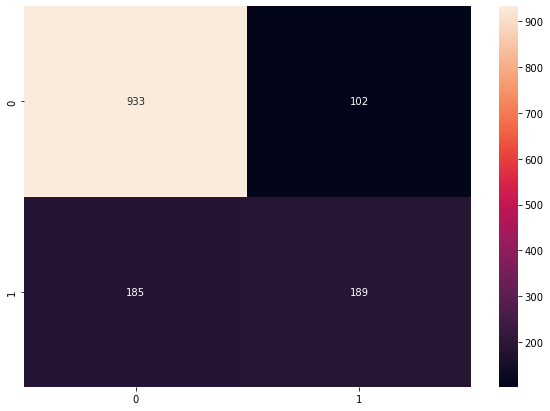

In [32]:
conf_matr = metrics.confusion_matrix(y_test, y1_predicted)
df_conf_matr = pd.DataFrame(conf_matr)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_matr, annot=True, fmt = 'g')
plt.show()

### Conclusion for the Improved model:
<li>Improved score is 65.4% at 12th iteration. Before hypertuning it was 53.4%
<li>The best hyperparameters are {'colsample_bytree': 0.8, 'gamma': 1.0, 'max_depth': 4, 'reg_alpha': 5, 'reg_lambda': 5}
<li> The best score is 0.5398
<li>The best score standard deviation is 0.0247


## PART B

#### Part 2 - Build a machine learning pipeline that will run autonomously with the csv file and return bestperforming model

### Checking Null values

In [33]:
def missing_values_fun(data):
    percentage_missing = data.isnull().sum() * 100 / len(data)
    data = data.replace(r'^\s*$', np.nan, regex=True)
    data = data.apply(lambda x: x.fillna(0),axis=0)
    missing_values = ["?", "a", "-"," "]
    ndfnew1 = data.replace(missing_values, np.nan)
    ndfnew1 = data.apply(lambda x: x.fillna(0),axis=0)
    Null_per = ndfnew1.isnull().sum()
    print(ndfnew1.iloc[1340,:])
    return ndfnew1

### Converting catagorical values to numeric

In [34]:
def to_numeric(dataset, attr_name):
    unique_vals = dataset[attr_name].unique()
    val_dict = {}
    for val in unique_vals:
        if not val in val_dict:
            val_dict[val] = len(val_dict)
    dataset[attr_name].replace(val_dict, inplace=True)
    return dataset, val_dict

In [35]:
def convertobj(data, columnname):
    data[columnname] = data[columnname].apply(pd.to_numeric, errors='coerce')
    return data

### Creating dummies

In [36]:
def create_dummies(data, target_feature):
    data.drop(columns = target_feature, axis=1,  inplace=True)
    data_columnlist = data.select_dtypes(include=['object']).columns.tolist()
    
    for i in data_columnlist:
        column_count = len(data[i].value_counts())
        if column_count == len(data):
            data.drop(i, axis=1, inplace = True)
        else:
            ndf_encoded1 = pd.get_dummies(data, i)
            return ndf_encoded1
    return ndf_encoded1

###  Split the data into train and test

In [37]:
def split_xy(encode, target_feature, test):
    x1_train, x1_test, y1_train, y1_test = train_test_split(encode,target_feature, test_size=test, random_state=42, stratify=target_feature)
    print("{0:0.2f}% data is in training set".format((len(x1_train)/len(encode.index)) * 100))
    print("{0:0.2f}% data is in test set".format((len(x1_test)/len(encode.index)) * 100))
    print(display(y1_train.value_counts(), y1_train.value_counts(normalize = True)*100))
    return x1_train, x1_test, y1_train, y1_test

### Normalize the Data

In [38]:
def norm(x_train, x_test, encode):
    x_train_norm = x_train.copy()
    x_test_norm = x_test.copy()
    totalx_cols = encode.columns
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train_norm)
    x_test_scaled = scaler.fit_transform(x_test_norm)
    return x_train_scaled, x_test_scaled

### Random search method

In [39]:
def rand_search(x_train_norm, x_test_norm, y1_train):
    param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,30),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
    scoring = ['recall']
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    xgbooster = XGBClassifier() 
    rand_model = RandomizedSearchCV(estimator=xgbooster, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
    random_result = rand_model.fit(x_train_norm, y1_train)
    pickle_rand = 'rand_model'
    picklefile = open(pickle_rand, 'wb')
    pickle.dump(rand_model, picklefile)
    print(f'The best score of RandomSearch is {random_result.best_score_:.4f}')
    print('The best score of RandomSearch standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
    print(f'The best hyperparameters of RandomSearch is {random_result.best_params_}')
    y_predicted = rand_model.predict(x_test_norm)
    return random_result, y_predicted, pickle_rand

### Gridsearch Method

In [40]:
def grid_search(x_train_norm, x_test_norm, y1_train):
    param_grid = { 
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    "reg_alpha": [0, 0.5, 1, 5],
    "reg_lambda": [0.5, 1, 5,10],
    "gamma":[0,0.25,1.0],
    "max_depth":[3,4,5]
      }
    scoring = ['recall']
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    xgbooster = XGBClassifier()
    grid_model = GridSearchCV(estimator=xgbooster, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
    grid_result = grid_model.fit(x_train_norm, y1_train)
    pickle_grid = 'grid_model'
    picklefile = open(pickle_grid, 'wb')
    pickle.dump(grid_model, picklefile)
    print(f'The best score of GridSearch is {grid_result.best_score_:.4f}')
    print('The best score standard deviation of GridSearch is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
    print(f'The best hyperparameters of GridSearch is {grid_result.best_params_}')
    y_predicted = grid_model.predict(x_test_norm)
    return grid_result, y_predicted, pickle_grid

### Random Forest Classifier Model

In [41]:
def randomforest(x_train_norm, x_test_norm, y1_train, y1_test):
    RF_model = RandomForestClassifier(n_estimators = 50)
    rfcl = RF_model.fit(x_train_norm, y1_train)
    pickle_RF = 'RF_model'
    picklefile = open(pickle_RF, 'wb')
    pickle.dump(RF_model, picklefile)
    RF_train_score = rfcl.score(x_train_norm, y1_train)
    RF_test_score = rfcl.score(x_test_norm, y1_test)
    print("train score of RF:", RF_train_score )
    print("test score of RF:", RF_test_score)
    y_predicted = rfcl.predict(x_test_norm)
    acc_RF = accuracy_score(y1_test, y_predicted)
    return rfcl, y_predicted,acc_RF, RF_train_score, RF_test_score, pickle_RF

### Decision Tree Model

In [42]:
def dTree(x_train_norm,x_test_norm, y1_train, y1_test):
    dTree_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
    dTree1 = dTree_model.fit(x_train_norm, y1_train)
    pickle_dTree = 'dTree_model'
    picklefile = open(pickle_dTree, 'wb')
    pickle.dump(dTree_model, picklefile)
    dTrainscore = dTree1.score(x_train_norm, y1_train)
    dTestscore = dTree1.score(x_test_norm, y1_test)
    print("train score of DecisionTree:", dTrainscore )
    print("test score of DecisionTree:", dTestscore )
    y_predicted = dTree1.predict(x_test_norm)
    return dTree1, dTrainscore, dTestscore, y_predicted, pickle_dTree

### Confusion Matrix

In [43]:
def conf_mat(y_test, predict):
    conf_matr = metrics.confusion_matrix(y_test, predict)
    df_conf_matr = pd.DataFrame(conf_matr)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_conf_matr, annot=True, fmt = 'g')
    plt.show()

## Preprocessing the Data

#### * DataFrame 2 (TelcomCustomer_Churn_2.csv) alone considered for this study

In [44]:
def preprocess_data(path_to_csv,target_feature, columntoconvert):
# 1. Reading CSV file
    data = pd.read_csv(path_to_csv)
    
# 2. Checking the Null Values
    Nullvalue = missing_values_fun(data)
    
# 3. Convert object to numeric
    objtonum = columntoconvert
    numericdata = convertobj(Nullvalue, objtonum)

# 4. Replacing Target feature to Numeric    
    unique_vals = numericdata[target_feature].unique()
    val_dict = {}
    for val in unique_vals:
        if not val in val_dict:
            val_dict[val] = len(val_dict)
        target = numericdata[target_feature].replace(val_dict)
        
# 5. Creating dummies for catagorical values
    ndf_encoded1 = create_dummies(numericdata, target_feature)                         
    return ndf_encoded1, target

In [45]:
def clf_report(y1_test, y_predicted):
    report_table = classification_report(y1_test, y_predicted)
    report = classification_report(y1_test, y_predicted, output_dict=True)
    lst = list(report)
    accuracy = report[lst[2]]
    print(report_table,'\n')
    print('Accuracy:', accuracy,'\n')
    return report, accuracy

## Main Method

customerID                       1371-DWPAZ
OnlineBackup                            Yes
DeviceProtection                        Yes
TechSupport                             Yes
StreamingTV                             Yes
StreamingMovies                          No
Contract                           Two year
PaperlessBilling                         No
PaymentMethod       Credit card (automatic)
MonthlyCharges                        56.05
TotalCharges                              0
Churn                                    No
Name: 1340, dtype: object
preprocessing completed 

79.99% data is in training set
20.01% data is in test set


0    4139
1    1495
Name: Churn, dtype: int64

0    73.464679
1    26.535321
Name: Churn, dtype: float64

None
Splitting completed 

Normalizing completed 

The best score of RandomSearch is 0.5117
The best score of RandomSearch standard deviation is 0.0345
The best hyperparameters of RandomSearch is {'reg_lambda': 1, 'reg_alpha': 1, 'max_depth': 3, 'learning_rate': 1, 'gamma': 0.4, 'colsample_bytree': 0.7}
RandomSearch Algorithm completed


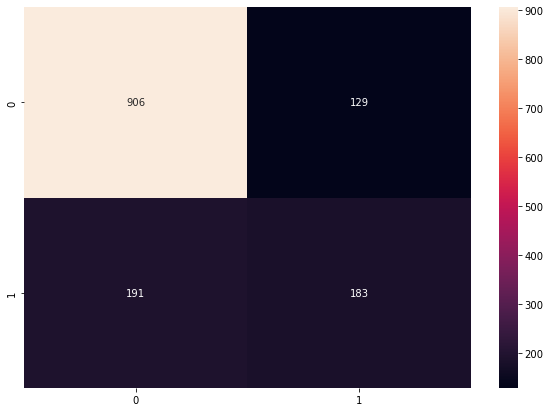

RandomSearch Confusion matrix completed
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.59      0.49      0.53       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409
 

Accuracy: 0.772888573456352 

The best score of GridSearch is 0.5217
The best score standard deviation of GridSearch is 0.0454
The best hyperparameters of GridSearch is {'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 3, 'reg_alpha': 0, 'reg_lambda': 1}
GridSearch Algorithm completed


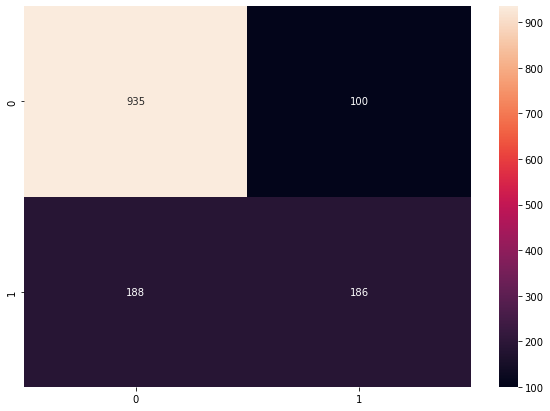

Grid Confusion matrix completed
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.50      0.56       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.80      0.79      1409
 

Accuracy: 0.7955997161107168 

train score of RF: 0.9950301739439119
test score of RF: 0.7707594038325053
RF Algorithm completed


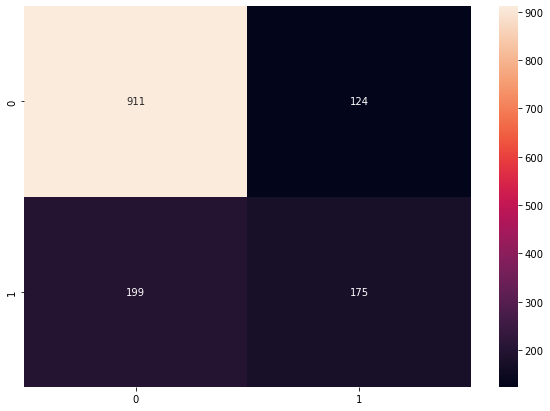

RF Confusion matrix completed
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.59      0.47      0.52       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409
 

Accuracy: 0.7707594038325053 

train score of DecisionTree: 0.996272630457934
test score of DecisionTree: 0.7274662881476224
DecisionTree algorithm completed


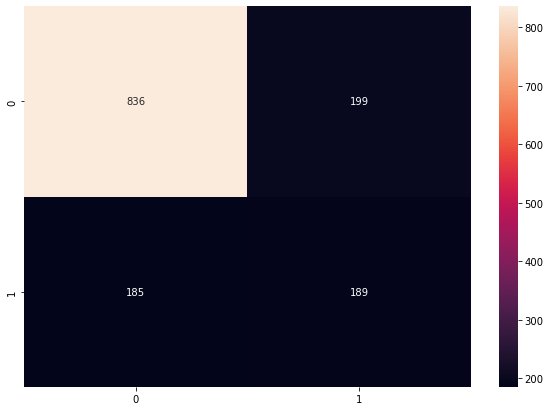

DTree Confusion matrix completed
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.51      0.50       374

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409
 

Accuracy: 0.7274662881476224 


 Best model for the above DataSet: GridSearch


In [46]:
# 1. Reading CSV file
encode, target = preprocess_data('C:\\Users\\Sai\\Desktop\GL\\Project3_ensumble_techniques\\TelcomCustomer_Churn_2.csv', 'Churn','TotalCharges')
print("preprocessing completed",'\n')

# 2. split
testper = 0.2
x1_train, x1_test, y1_train, y1_test = split_xy(encode, target, testper)
print("Splitting completed",'\n')

# 3. Norm
x_train_norm, x_test_norm = norm(x1_train, x1_test, encode)
P = x1_train.isnull().sum()* 100 / len(x1_train)
print("Normalizing completed",'\n')

# 4. Random search
rand_search, rand_y_predicted, pickle_rand = rand_search(x_train_norm, x_test_norm, y1_train)
print("RandomSearch Algorithm completed")

# 5.  Plot confusion matrix
conf_mat(y1_test, rand_y_predicted)
print("RandomSearch Confusion matrix completed")

# 6. Classification Report of RandomSearch
rand_report, acc_rand = clf_report(y1_test, rand_y_predicted)
acc = {}
acc['RandomSearch'] = acc_rand

# 7.  GridSerch algorithm
grid_search, grid_y_predicted, pickle_grid = grid_search(x_train_norm, x_test_norm, y1_train)
print("GridSearch Algorithm completed")

# 8.  Plot confusion matrix
conf_mat(y1_test, grid_y_predicted)
print("Grid Confusion matrix completed")

# 9. Classification Report of GridSearch
grid_report, acc_grid = clf_report(y1_test, grid_y_predicted)
acc['GridSearch'] = acc_grid

# 10. RandomForest Method
rfcl, RF_y_predicted,acc_RF, RF_train_score, RF_test_score, pickle_RF = randomforest(x_train_norm, x_test_norm, y1_train, y1_test)
print("RF Algorithm completed")

# 11.  Plot confusion matrix
conf_mat(y1_test, RF_y_predicted)
print("RF Confusion matrix completed")

# 12. Classification Report of RF
RF_report, acc_RF = clf_report(y1_test, RF_y_predicted)
acc['RandomForest'] = acc_RF

# 13. DecisionTree Method
dTree1, dTrainscore, dTestscore, dTree_y_predicted,pickle_dTree = dTree(x_train_norm,x_test_norm, y1_train, y1_test)
print("DecisionTree algorithm completed")

# 14.  Plot confusion matrix
conf_mat(y1_test, dTree_y_predicted)
print("DTree Confusion matrix completed")

# 15. Classification Report of dTree
dTree_report, acc_dTree = clf_report(y1_test, dTree_y_predicted)
acc['DecisionTree'] = acc_dTree

# 16. Best Model for the above DataSet
Best_model = max(acc, key=acc.get)
print('\n', '\033[1m' + "Best model for the above DataSet:", Best_model)


## Loading Pickled files

In [47]:
pickled_rand_model = pickle.load(open(pickle_rand, 'rb'))
pickled_rand_model.predict(x_test_norm)

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
pickled_grid_model = pickle.load(open(pickle_grid, 'rb'))
pickled_grid_model.predict(x_test_norm)

array([0, 1, 0, ..., 0, 0, 0])

In [49]:
pickled_RF_model = pickle.load(open(pickle_RF, 'rb'))
pickled_RF_model.predict(x_test_norm)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
pickled_dTree_model = pickle.load(open(pickle_dTree, 'rb'))
pickled_dTree_model.predict(x_test_norm)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)